**MAKING A CORPUS**

In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
morrowind_books_homepage = "https://www.imperial-library.info/game-books/tes3-morrowind-books"
homepage_contents = rq.get(morrowind_books_homepage)

soup = BeautifulSoup(homepage_contents.text, features="html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" prefix="og: https://ogp.me/ns#">
 <head>
  <style>
   img.lazy{min-height:1px}
  </style>
  <link as="script" href="https://www.imperial-library.info/wp-content/plugins/w3-total-cache/pub/js/lazyload.min.js" rel="preload"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <title>
   TES3: Morrowind Books — The Imperial Library
  </title>
  <meta content="This page lists all of the books included in The Elder Scrolls 3: Morrowind, which was released in 2002. Books released in its expansions, Tribunal (2002) and" name="description"/>
  <meta content="follow, index, max-snippet:-1, max-video-preview:-1, max-image-preview:large" name="robots"/>
  <link href="https://www.imperial-library.info/game-books/tes3-morrowind-books" rel="canonical"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="article" property="og:type"/>
  <meta content="

In [3]:
headings_listed = []
for heading in soup.find_all('a'):
  headings_listed.append(heading.text)

In [4]:
print(headings_listed)

['\nSkip to content', '\nThe Imperial Library\n', 'Game Books\n\n', '\n\nTES2: Daggerfall Books', '\n\nTES Legends: Battlespire Books', '\n\nTES Adventures: Redguard Books', '\n\nTES3: Morrowind Books', '\n\nTES Travels: Shadowkey Books', '\n\nTES4: Oblivion Books', '\n\nTES5: Skyrim Books', '\n\nElder Scrolls Online Books', 'Print Books\n\n', '\n\nPocket Guide to the Empire, First Edition', '\n\nPocket Guide to The Empire, Third Edition', '\n\nThe Improved Emperor’s Guide to Tamriel', '\n\nInfernal City Lore Notes', '\n\nLord of Souls Lore Notes', '\n\nAgents and Reagents', '\n\nGathering Force', '\n\nKyne’s Challenge', '\n\nThe Origin of Cyrus!', '\n\nNaryu’s Journal', '\n\nThe Alinor Codex', 'Transcripts\n\n', '\n\nTES1: Arena Transcripts', '\n\nTES2: Daggerfall Transcripts', '\n\nTESL: Battlespire Transcript', '\n\nTESA: Redguard Transcripts', '\n\nTES3: Morrowind Transcripts', '\n\nTES4: Oblivion Transcripts', '\n\nTES5: Skyrim Transcripts', '\n\nTES Online Transcripts', '\n\nTES 

In [5]:
book_titles = []
stop_titles = ['\nSkip to content', '\nThe Imperial Library\n', 'Game Books\n\n', '\n\nTES2: Daggerfall Books', '\n\nTES Legends: Battlespire Books', '\n\nTES Adventures: Redguard Books', '\n\nTES3: Morrowind Books', '\n\nTES Travels: Shadowkey Books', '\n\nTES4: Oblivion Books', '\n\nTES5: Skyrim Books', '\n\nElder Scrolls Online Books', 'Print Books\n\n', '\n\nPocket Guide to the Empire, First Edition', '\n\nPocket Guide to The Empire, Third Edition', '\n\nThe Improved Emperor’s Guide to Tamriel', '\n\nInfernal City Lore Notes', '\n\nLord of Souls Lore Notes', '\n\nAgents and Reagents', '\n\nGathering Force', '\n\nKyne’s Challenge', '\n\nThe Origin of Cyrus!', '\n\nNaryu’s Journal', '\n\nThe Alinor Codex', 'Transcripts\n\n', '\n\nTES1: Arena Transcripts', '\n\nTES2: Daggerfall Transcripts', '\n\nTESL: Battlespire Transcript', '\n\nTESA: Redguard Transcripts', '\n\nTES3: Morrowind Transcripts', '\n\nTES4: Oblivion Transcripts', '\n\nTES5: Skyrim Transcripts', '\n\nTES Online Transcripts', '\n\nTES Legends Transcripts', '\n\nTES Blades Transcripts', '\n\nOther Transcripts', 'Articles\n\n', '\n\nThe Timeline', '\n\nThe Calendar', '\n\nAstronomy and Astrology', '\n\nThe Nine Divines', '\n\nTamrielic Alphabets', '\n\nTamrielic Languages', '\n\nRaces of Nirn', '\n\nKhajiit Physiology', '\n\nGuide to the Psijic Order', '\n\nAntiquities Codexes', '\n\nItems of the Second Era', '\n\nLGBTQ+ in Tamriel', 'Galleries\n\n', '\n\nCartography', '\n\nGame Galleries', '\n\nArtist Galleries', 'Out of Game\n\n', '\n\nWebsite Content', '\n\nInterviews', '\n\nDeveloper Writings', '\n\nCut Content', '\n\nGame Data', '\n\nCommunity Archives', '\n\nWho Did What?', 'Community\n\n', '\n\nAbout Us', '\n\nHow to Help', '\n\nHistory of the Library', '\n\nElder Scrolls Elsewhere', '\n\nPrivacy Policy', '\n\n', '\nThe Imperial Library\n', '\n\n', 'Game Books\n\n', '\n\nTES2: Daggerfall Books', '\n\nTES Legends: Battlespire Books', '\n\nTES Adventures: Redguard Books', '\n\nTES3: Morrowind Books', '\n\nTES Travels: Shadowkey Books', '\n\nTES4: Oblivion Books', '\n\nTES5: Skyrim Books', '\n\nElder Scrolls Online Books', 'Print Books\n\n', '\n\nPocket Guide to the Empire, First Edition', '\n\nPocket Guide to The Empire, Third Edition', '\n\nThe Improved Emperor’s Guide to Tamriel', '\n\nInfernal City Lore Notes', '\n\nLord of Souls Lore Notes', '\n\nAgents and Reagents', '\n\nGathering Force', '\n\nKyne’s Challenge', '\n\nThe Origin of Cyrus!', '\n\nNaryu’s Journal', '\n\nThe Alinor Codex', 'Transcripts\n\n', '\n\nTES1: Arena Transcripts', '\n\nTES2: Daggerfall Transcripts', '\n\nTESL: Battlespire Transcript', '\n\nTESA: Redguard Transcripts', '\n\nTES3: Morrowind Transcripts', '\n\nTES4: Oblivion Transcripts', '\n\nTES5: Skyrim Transcripts', '\n\nTES Online Transcripts', '\n\nTES Legends Transcripts', '\n\nTES Blades Transcripts', '\n\nOther Transcripts', 'Articles\n\n', '\n\nThe Timeline', '\n\nThe Calendar', '\n\nAstronomy and Astrology', '\n\nThe Nine Divines', '\n\nTamrielic Alphabets', '\n\nTamrielic Languages', '\n\nRaces of Nirn', '\n\nKhajiit Physiology', '\n\nGuide to the Psijic Order', '\n\nAntiquities Codexes', '\n\nItems of the Second Era', '\n\nLGBTQ+ in Tamriel', 'Galleries\n\n', '\n\nCartography', '\n\nGame Galleries', '\n\nArtist Galleries', 'Out of Game\n\n', '\n\nWebsite Content', '\n\nInterviews', '\n\nDeveloper Writings', '\n\nCut Content', '\n\nGame Data', '\n\nCommunity Archives', '\n\nWho Did What?', 'Community\n\n', '\n\nAbout Us', '\n\nHow to Help', '\n\nHistory of the Library', '\n\nElder Scrolls Elsewhere', '\n\nPrivacy Policy', 'here', 'Fiction & Narrative', 'Guilds & Societies', 'Histories & Biographies', 'Manuals & Instructions', 'People & Places', 'Politics & Propaganda', 'Religion & Legends', 'Research', 'Songs & Poems', 'Jokes & Riddles', 'Plays', 'Other', 'Advertisements', 'Announcements & Warnings', 'Inscriptions & Epitaphs', 'Journals', 'Letters & Notes', 'Lists & Records',  'About Us', 'Privacy Policy', 'Privacy Policy', 'Powered by\xa0 GDPR Cookie Compliance', 'Privacy Policy']
for heading in headings_listed:
  if heading not in stop_titles:
    book_titles.append(heading)

In [6]:
print(book_titles)

['A Dance in Fire', 'A Game at Dinner', 'Ancient Tales of the Dwemer', 'Bone', 'Breathing Water', 'Chance’s Folly', 'Confessions of a Dunmer Skooma-Eater', 'Feyfolken', 'Final Lesson', 'Hallgerd’s Tale', 'Ice and Chitin', 'Incident in Necrom', 'Last Scabbard of Akrash', 'Master Zoaraym’s Tale', 'Mystery of Princess Talara', 'Night Falls on Sentinel', 'Palla', 'Realizations of Acrobacy', 'Ruins of Kemel-Ze', 'Silence', 'Smuggler’s Island', 'Surfeit of Thieves', 'The Armorers’ Challenge [TES3]', 'The Axe Man', 'The Black Arrow', 'The Cake and the Diamond', 'The Four Suitors of Benitah', 'The Gold Ribbon of Merrit', 'The Hope of the Redoran', 'The Locked Room', 'The Marksmanship Lesson', 'The Mirror', 'The Poison Song', 'The Prayers of Baranat', 'The Rear Guard', 'The Wraith’s Wedding Dowry', 'Three Thieves', 'Trap', 'Vernaccus and Bourlor', 'Withershins', 'Brown Book of 3E 426', 'For My Gods and Emperor', 'Grasping Fortune', 'Great Houses of Morrowind', 'Honor Among Thieves', 'Imperial C

In [7]:
homepage_urls = []
for url in soup.find_all("a"):
  homepage_urls.append(url.get('href'))

print(homepage_urls)

['#content', 'https://www.imperial-library.info/', 'https://www.imperial-library.info/game-books', 'https://www.imperial-library.info/game-books/tes2-daggerfall-books', 'https://www.imperial-library.info/game-books/tesl-battlespire-books', 'https://www.imperial-library.info/game-books/tesa-redguard-books', 'https://www.imperial-library.info/game-books/tes3-morrowind-books', 'https://www.imperial-library.info/game-books/tes-travels-shadowkey-books', 'https://www.imperial-library.info/game-books/tes4-oblivion-books', 'https://www.imperial-library.info/game-books/tes5-skyrim-books', 'https://www.imperial-library.info/game-books/elder-scrolls-online-books', 'https://www.imperial-library.info/print-books', 'https://www.imperial-library.info/content/pocket-guide-empire-and-its-environs-first-edition', 'https://www.imperial-library.info/content/pocket-guide-empire-and-its-environs-third-edition', 'https://www.imperial-library.info/content/emperors-guide', 'https://www.imperial-library.info/co

In [8]:
book_urls = []
stop_urls = ['#content', 'https://www.imperial-library.info/', 'https://www.imperial-library.info/game-books', 'https://www.imperial-library.info/game-books/tes2-daggerfall-books', 'https://www.imperial-library.info/game-books/tesl-battlespire-books', 'https://www.imperial-library.info/game-books/tesa-redguard-books', 'https://www.imperial-library.info/game-books/tes3-morrowind-books', 'https://www.imperial-library.info/game-books/tes-travels-shadowkey-books', 'https://www.imperial-library.info/game-books/tes4-oblivion-books', 'https://www.imperial-library.info/game-books/tes5-skyrim-books', 'https://www.imperial-library.info/game-books/elder-scrolls-online-books', 'https://www.imperial-library.info/print-books', 'https://www.imperial-library.info/content/pocket-guide-empire-and-its-environs-first-edition', 'https://www.imperial-library.info/content/pocket-guide-empire-and-its-environs-third-edition', 'https://www.imperial-library.info/content/emperors-guide', 'https://www.imperial-library.info/content/infernal-city-lore-notes', 'https://www.imperial-library.info/content/lord-souls-lore-notes', 'https://www.imperial-library.info/content/agents-and-reagents', 'https://www.imperial-library.info/content/gathering-force', 'https://www.imperial-library.info/content/kynes-challenge', 'https://www.imperial-library.info/content/origin-cyrus', 'https://www.imperial-library.info/content/naryus-journal', 'https://www.imperial-library.info/content/alinor-codex', 'https://www.imperial-library.info/transcripts', 'https://www.imperial-library.info/transcripts/tes1-arena-transcripts', 'https://www.imperial-library.info/transcripts/tes2-transcripts', 'https://www.imperial-library.info/transcripts/tesl-battlespire-transcript', 'https://www.imperial-library.info/transcripts/tesa-redguard-transcripts', 'https://www.imperial-library.info/transcripts/tes3-morrowind-transcripts', 'https://www.imperial-library.info/transcripts/tes4-oblivion-transcripts', 'https://www.imperial-library.info/transcripts/tes5-skyrim-transcripts', 'https://www.imperial-library.info/transcripts/elder-scrolls-online-transcripts', 'https://www.imperial-library.info/transcripts/elder-scrolls-legends-transcripts', 'https://www.imperial-library.info/transcripts/tes-blades-transcripts', 'https://www.imperial-library.info/transcripts/other-transcripts', 'https://www.imperial-library.info/articles', 'https://www.imperial-library.info/articles/tamriel-timeline', 'https://www.imperial-library.info/content/calendar-tamriel', 'https://www.imperial-library.info/content/astronomy-and-astrology', 'https://www.imperial-library.info/articles/the-nine-divines', 'https://www.imperial-library.info/articles/tamrielic-alphabets', 'https://www.imperial-library.info/articles/translation-dictionary', 'https://www.imperial-library.info/content/races-of-nirn', 'https://www.imperial-library.info/content/khajiit-physiology-phases-and-forms', 'https://www.imperial-library.info/content/guide-psijic-order', 'https://www.imperial-library.info/articles/antiquities-codexes', 'https://www.imperial-library.info/articles/items-second-era', 'https://www.imperial-library.info/content/lgbtq-tamriel', 'https://www.imperial-library.info/galleries', 'https://www.imperial-library.info/galleries/cartography', 'https://www.imperial-library.info/galleries/gallery-tes', 'https://www.imperial-library.info/galleries/artist-galleries', 'https://www.imperial-library.info/out-of-game', 'https://www.imperial-library.info/out-of-game/website-content', 'https://www.imperial-library.info/out-of-game/interviews', 'https://www.imperial-library.info/out-of-game/developer-writings', 'https://www.imperial-library.info/out-of-game/cut-content', 'https://www.imperial-library.info/out-of-game/game-data', 'https://www.imperial-library.info/special-collections/community-archives', 'https://www.imperial-library.info/content/who-did-what', 'https://www.imperial-library.info/special-collections', 'https://www.imperial-library.info/special-collections/about-us', 'https://www.imperial-library.info/how-to-help', 'https://www.imperial-library.info/content/history-of-the-library', 'https://www.imperial-library.info/content/elder-scrolls-elsewhere', 'https://www.imperial-library.info/special-collections/privacy-policy', '#', 'https://www.imperial-library.info/', '#', 'https://www.imperial-library.info/game-books', 'https://www.imperial-library.info/game-books/tes2-daggerfall-books', 'https://www.imperial-library.info/game-books/tesl-battlespire-books', 'https://www.imperial-library.info/game-books/tesa-redguard-books', 'https://www.imperial-library.info/game-books/tes3-morrowind-books', 'https://www.imperial-library.info/game-books/tes-travels-shadowkey-books', 'https://www.imperial-library.info/game-books/tes4-oblivion-books', 'https://www.imperial-library.info/game-books/tes5-skyrim-books', 'https://www.imperial-library.info/game-books/elder-scrolls-online-books', 'https://www.imperial-library.info/print-books', 'https://www.imperial-library.info/content/pocket-guide-empire-and-its-environs-first-edition', 'https://www.imperial-library.info/content/pocket-guide-empire-and-its-environs-third-edition', 'https://www.imperial-library.info/content/emperors-guide', 'https://www.imperial-library.info/content/infernal-city-lore-notes', 'https://www.imperial-library.info/content/lord-souls-lore-notes', 'https://www.imperial-library.info/content/agents-and-reagents', 'https://www.imperial-library.info/content/gathering-force', 'https://www.imperial-library.info/content/kynes-challenge', 'https://www.imperial-library.info/content/origin-cyrus', 'https://www.imperial-library.info/content/naryus-journal', 'https://www.imperial-library.info/content/alinor-codex', 'https://www.imperial-library.info/transcripts', 'https://www.imperial-library.info/transcripts/tes1-arena-transcripts', 'https://www.imperial-library.info/transcripts/tes2-transcripts', 'https://www.imperial-library.info/transcripts/tesl-battlespire-transcript', 'https://www.imperial-library.info/transcripts/tesa-redguard-transcripts', 'https://www.imperial-library.info/transcripts/tes3-morrowind-transcripts', 'https://www.imperial-library.info/transcripts/tes4-oblivion-transcripts', 'https://www.imperial-library.info/transcripts/tes5-skyrim-transcripts', 'https://www.imperial-library.info/transcripts/elder-scrolls-online-transcripts', 'https://www.imperial-library.info/transcripts/elder-scrolls-legends-transcripts', 'https://www.imperial-library.info/transcripts/tes-blades-transcripts', 'https://www.imperial-library.info/transcripts/other-transcripts', 'https://www.imperial-library.info/articles', 'https://www.imperial-library.info/articles/tamriel-timeline', 'https://www.imperial-library.info/content/calendar-tamriel', 'https://www.imperial-library.info/content/astronomy-and-astrology', 'https://www.imperial-library.info/articles/the-nine-divines', 'https://www.imperial-library.info/articles/tamrielic-alphabets', 'https://www.imperial-library.info/articles/translation-dictionary', 'https://www.imperial-library.info/content/races-of-nirn', 'https://www.imperial-library.info/content/khajiit-physiology-phases-and-forms', 'https://www.imperial-library.info/content/guide-psijic-order', 'https://www.imperial-library.info/articles/antiquities-codexes', 'https://www.imperial-library.info/articles/items-second-era', 'https://www.imperial-library.info/content/lgbtq-tamriel', 'https://www.imperial-library.info/galleries', 'https://www.imperial-library.info/galleries/cartography', 'https://www.imperial-library.info/galleries/gallery-tes', 'https://www.imperial-library.info/galleries/artist-galleries', 'https://www.imperial-library.info/out-of-game', 'https://www.imperial-library.info/out-of-game/website-content', 'https://www.imperial-library.info/out-of-game/interviews', 'https://www.imperial-library.info/out-of-game/developer-writings', 'https://www.imperial-library.info/out-of-game/cut-content', 'https://www.imperial-library.info/out-of-game/game-data', 'https://www.imperial-library.info/special-collections/community-archives', 'https://www.imperial-library.info/content/who-did-what', 'https://www.imperial-library.info/special-collections', 'https://www.imperial-library.info/special-collections/about-us', 'https://www.imperial-library.info/how-to-help', 'https://www.imperial-library.info/content/history-of-the-library', 'https://www.imperial-library.info/content/elder-scrolls-elsewhere', 'https://www.imperial-library.info/special-collections/privacy-policy', 'https://www.imperial-library.info/game-books/books-introduced-in-tes3-morrowind', '#fiction-narrative', '#guilds-societies', '#histories-biographies', '#manuals-instructions', '#people-places', '#politics-propaganda', '#religion-legends', '#research', '#songs-poems', '#jokes-riddles', '#plays', '#other', '#advertisements', '#announcements-warnings', '#inscriptions-epitaphs', '#journals', '#letters-notes', '#lists-records', 'https://www.imperial-library.info/special-collections/about-us', 'https://www.imperial-library.info/special-collections/privacy-policy', '/special-collections/privacy-policy', 'https://wordpress.org/plugins/gdpr-cookie-compliance/', '/privacy-policy']
for url in homepage_urls:
  if url not in stop_urls:
    book_urls.append(url)

In [9]:
print(book_urls)

['https://www.imperial-library.info/content/dance-fire', 'https://www.imperial-library.info/content/game-dinner', 'https://www.imperial-library.info/content/ancient-tales-dwemer', 'https://www.imperial-library.info/content/bone', 'https://www.imperial-library.info/content/morrowind-breathing-water', 'https://www.imperial-library.info/content/chances-folly', 'https://www.imperial-library.info/content/confessions-dunmer-skooma-eater', 'https://www.imperial-library.info/content/feyfolken', 'https://www.imperial-library.info/content/final-lesson', 'https://www.imperial-library.info/content/hallgerds-tale', 'https://www.imperial-library.info/content/ice-and-chitin', 'https://www.imperial-library.info/content/incident-necrom', 'https://www.imperial-library.info/content/last-scabbard-akrash', 'https://www.imperial-library.info/content/master-zoarayms-tale', 'https://www.imperial-library.info/content/mystery-of-princess-talara', 'https://www.imperial-library.info/content/night-falls-sentinel',

In [10]:
texts =[]
for url in book_urls:
    book_contents=rq.get((url))
    book_contents.encoding = 'utf-8'
    soup = BeautifulSoup(book_contents.text, features="html.parser")
    soup.prettify()
    soup.find("div.entry-content.clear")
    soup.find_all('p')
    texts.append(soup.text)

In [11]:
len(texts)
#texts_to_string=str(texts)
#print(texts_to_string)

290

In [12]:
texts_cleared =[]
for text in texts:
  text_cleared_stepone=text.replace("\nSkip to content\n\n\nThe Imperial Library\n\nGame Books\n\nMenu Toggle\n\n\n\n\nTES2: Daggerfall Books\n\n\nTES Legends: Battlespire Books\n\n\nTES Adventures: Redguard Books\n\n\nTES3: Morrowind Books\n\n\nTES Travels: Shadowkey Books\n\n\nTES4: Oblivion Books\n\n\nTES5: Skyrim Books\n\n\nElder Scrolls Online Books\n\nPrint Books\n\nMenu Toggle\n\n\n\n\nPocket Guide to the Empire, First Edition\n\n\nPocket Guide to The Empire, Third Edition\n\n\nThe Improved Emperor’s Guide to Tamriel\n\n\nInfernal City Lore Notes\n\n\nLord of Souls Lore Notes\n\n\nAgents and Reagents\n\n\nGathering Force\n\n\nKyne’s Challenge\n\n\nThe Origin of Cyrus!\n\n\nNaryu’s Journal\n\n\nThe Alinor Codex\n\nTranscripts\n\nMenu Toggle\n\n\n\n\nTES1: Arena Transcripts\n\n\nTES2: Daggerfall Transcripts\n\n\nTESL: Battlespire Transcript\n\n\nTESA: Redguard Transcripts\n\n\nTES3: Morrowind Transcripts\n\n\nTES4: Oblivion Transcripts\n\n\nTES5: Skyrim Transcripts\n\n\nTES Online Transcripts\n\n\nTES Legends Transcripts\n\n\nTES Blades Transcripts\n\n\nOther Transcripts\n\nArticles\n\nMenu Toggle\n\n\n\n\nThe Timeline\n\n\nThe Calendar\n\n\nAstronomy and Astrology\n\n\nThe Nine Divines\n\n\nTamrielic Alphabets\n\n\nTamrielic Languages\n\n\nRaces of Nirn\n\n\nKhajiit Physiology\n\n\nGuide to the Psijic Order\n\n\nAntiquities Codexes\n\n\nItems of the Second Era\n\n\nLGBTQ+ in Tamriel\n\nGalleries\n\nMenu Toggle\n\n\n\n\nCartography\n\n\nGame Galleries\n\n\nArtist Galleries\n\nOut of Game\n\nMenu Toggle\n\n\n\n\nWebsite Content\n\n\nInterviews\n\n\nDeveloper Writings\n\n\nCut Content\n\n\nGame Data\n\n\nCommunity Archives\n\n\nWho Did What?\n\nCommunity\n\nMenu Toggle\n\n\n\n\nAbout Us\n\n\nHow to Help\n\n\nHistory of the Library\n\n\nElder Scrolls Elsewhere\n\n\nPrivacy Policy\n\n\n\n\n\nThe Imperial Library\n\n\n\n\n\nMain Menu\n\n \nGame Books\n\nMenu Toggle\n\n\n\n\nTES2: Daggerfall Books\n\n\nTES Legends: Battlespire Books\n\n\nTES Adventures: Redguard Books\n\n\nTES3: Morrowind Books\n\n\nTES Travels: Shadowkey Books\n\n\nTES4: Oblivion Books\n\n\nTES5: Skyrim Books\n\n\nElder Scrolls Online Books\n\nPrint Books\n\nMenu Toggle\n\n\n\n\nPocket Guide to the Empire, First Edition\n\n\nPocket Guide to The Empire, Third Edition\n\n\nThe Improved Emperor’s Guide to Tamriel\n\n\nInfernal City Lore Notes\n\n\nLord of Souls Lore Notes\n\n\nAgents and Reagents\n\n\nGathering Force\n\n\nKyne’s Challenge\n\n\nThe Origin of Cyrus!\n\n\nNaryu’s Journal\n\n\nThe Alinor Codex\n\nTranscripts\n\nMenu Toggle\n\n\n\n\nTES1: Arena Transcripts\n\n\nTES2: Daggerfall Transcripts\n\n\nTESL: Battlespire Transcript\n\n\nTESA: Redguard Transcripts\n\n\nTES3: Morrowind Transcripts\n\n\nTES4: Oblivion Transcripts\n\n\nTES5: Skyrim Transcripts\n\n\nTES Online Transcripts\n\n\nTES Legends Transcripts\n\n\nTES Blades Transcripts\n\n\nOther Transcripts\n\nArticles\n\nMenu Toggle\n\n\n\n\nThe Timeline\n\n\nThe Calendar\n\n\nAstronomy and Astrology\n\n\nThe Nine Divines\n\n\nTamrielic Alphabets\n\n\nTamrielic Languages\n\n\nRaces of Nirn\n\n\nKhajiit Physiology\n\n\nGuide to the Psijic Order\n\n\nAntiquities Codexes\n\n\nItems of the Second Era\n\n\nLGBTQ+ in Tamriel\n\nGalleries\n\nMenu Toggle\n\n\n\n\nCartography\n\n\nGame Galleries\n\n\nArtist Galleries\n\nOut of Game\n\nMenu Toggle\n\n\n\n\nWebsite Content\n\n\nInterviews\n\n\nDeveloper Writings\n\n\nCut Content\n\n\nGame Data\n\n\nCommunity Archives\n\n\nWho Did What?\n\nCommunity\n\nMenu Toggle\n\n\n\n\nAbout Us\n\n\nHow to Help\n\n\nHistory of the Library\n\n\nElder Scrolls Elsewhere\n\n\nPrivacy Policy\n", "")
  text_cleared_steptwo=text_cleared_stepone.replace("About Us\nPrivacy Policy\nNight Mode\n\n\n\n\nText Size\nAThe Elder Scrolls © 2024 Bethesda Softworks LLC, a ZeniMax Media company. All Rights Reserved.Original content © 2024 The Imperial Library\n\n\nStart typing and press enter to search\n\nSearch...\n\n\n \n\n We use cookies to improve the functionality of this website. We never sell your data. Check out our Privacy Policy for more information.\nAccept\nCustomize\n\n\n Scroll to Top            \n\nClose GDPR Cookie Settings\n\n\n\n\n\nPrivacy Overview\n\n\n\nStrictly Necessary Cookies\n\n\n\n3rd Party Cookies\n\n\nPowered by\xa0 GDPR Cookie Compliance\nPrivacy OverviewThis website uses cookies so that we can provide you with the best user experience possible. Cookie information is stored in your browser and performs functions such as recognizing you when you return to our website and helping our team to understand which sections of the website you find most useful.Please read our full Privacy Policy for more information.\nStrictly Necessary CookiesStrictly Necessary Cookies should be enabled at all times so that we can save your preferences for cookie settings.\n\nEnable or Disable Cookies\n\n\nIf you disable this cookie, we will not be able to save your preferences. This means that every time you visit this website you will need to enable or disable cookies again.\n3rd Party CookiesThis website uses Google Analytics to collect anonymous information such as the number of visitors to the site, and the most popular pages.Keeping this cookie enabled helps us to improve our website.\n\nEnable or Disable Cookies\n\n\nPlease enable Strictly Necessary Cookies first so that we can save your preferences!\nEnable All\nSave Settings\n", "")
  texts_cleared.append(text_cleared_steptwo)

In [13]:
#print(texts_cleared)

In [14]:
headings = {'Title': book_titles, 'URL': book_urls, 'Text': texts_cleared}

morrowind_books_df = pd.DataFrame(headings)

morrowind_books_df.head(3)

Title  \
0              A Dance in Fire   
1             A Game at Dinner   
2  Ancient Tales of the Dwemer   

                                                 URL  \
0  https://www.imperial-library.info/content/danc...   
1  https://www.imperial-library.info/content/game...   
2  https://www.imperial-library.info/content/anci...   

                                                Text  
0  A Dance in Fire — The Imperial Library       A...  
1  A Game at Dinner — The Imperial Library       ...  
2  Ancient Tales of the Dwemer — The Imperial Lib...

In [15]:
morrowind_books_df.to_csv("morrobooks.csv")

In [16]:
import nltk

from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer

import re

In [17]:
texts_tokenized = []
for text in texts_cleared:
  texts_lowercased=text.lower()

  tokenizer = RegexpTokenizer(r'\w+')
  text_tokens=tokenizer.tokenize(texts_lowercased)
  texts_tokenized.append(text_tokens)

In [72]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list_extended = ['know', 'library', 'must', 'see', 'even', 'may', 'many', 'back', 'first', 'author', 'another', 'still', 'might' 'like', 'one', 'said', 'would', 'could','\nreleased in:', 'tes3', 'tes4', 'tes5', 'online', 'tesl', 'tes2', 'tes5', 'tes3', 'tes3', 'jokes & riddles', 'announcements & warnings', 'inscriptions & epitaphs', 'journals', 'letters & notes', 'lists & records', 'plays', 'other', 'advertisements', 'category', 'manuals & instructions', 'religion & legends', 'songs & poems', 'research', 'histories & biographies', 'politics & propaganda', 'fiction & narrative', 'guilds & societies', 'places & people', 'author' 'in-game']

morrobooks_words = []
for text in texts_tokenized:
  for token in text:
    if token not in stopwords_list:
      if token not in stopwords_list_extended:
        morrobooks_words.append(token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
print(morrobooks_words)

['dance', 'fire', 'imperial', 'dance', 'fire', 'released', 'morrowind', 'oblivion', 'skyrim', 'fiction', 'narrative', 'game', 'waughin', 'jartha', 'dance', 'fire', 'v1scene', 'imperial', 'city', 'cyrodiildate', '7', 'frost', 'fall', '3e', '397it', 'seemed', 'palace', 'always', 'housed', 'atrius', 'building', 'commission', 'company', 'clerks', 'estate', 'agents', 'authored', 'notarized', 'nearly', 'every', 'construction', 'note', 'empire', 'stood', 'two', 'hundred', 'fifty', 'years', 'since', 'reign', 'emperor', 'magnus', 'plain', 'fronted', 'austere', 'hall', 'minor', 'respectable', 'plaza', 'imperial', 'city', 'energetic', 'ambitious', 'middle', 'class', 'lads', 'ladies', 'worked', 'well', 'complacent', 'middle', 'aged', 'ones', 'like', 'decumus', 'scotti', 'imagine', 'world', 'without', 'commission', 'least', 'scotti', 'accurate', 'imagine', 'world', 'without', 'commission', 'lord', 'atrius', 'perfectly', 'aware', 'contributions', 'managing', 'clerk', 'closing', 'shutter', 'demarcate

In [74]:
len(morrobooks_words)

147372

In [75]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

morrobooks_lemmatized = []
for token in morrobooks_words:
  token_lemmatized=lemmatizer.lemmatize(token)
  morrobooks_lemmatized.append(token_lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [76]:
print(morrobooks_lemmatized)

['dance', 'fire', 'imperial', 'dance', 'fire', 'released', 'morrowind', 'oblivion', 'skyrim', 'fiction', 'narrative', 'game', 'waughin', 'jartha', 'dance', 'fire', 'v1scene', 'imperial', 'city', 'cyrodiildate', '7', 'frost', 'fall', '3e', '397it', 'seemed', 'palace', 'always', 'housed', 'atrius', 'building', 'commission', 'company', 'clerk', 'estate', 'agent', 'authored', 'notarized', 'nearly', 'every', 'construction', 'note', 'empire', 'stood', 'two', 'hundred', 'fifty', 'year', 'since', 'reign', 'emperor', 'magnus', 'plain', 'fronted', 'austere', 'hall', 'minor', 'respectable', 'plaza', 'imperial', 'city', 'energetic', 'ambitious', 'middle', 'class', 'lad', 'lady', 'worked', 'well', 'complacent', 'middle', 'aged', 'one', 'like', 'decumus', 'scotti', 'imagine', 'world', 'without', 'commission', 'least', 'scotti', 'accurate', 'imagine', 'world', 'without', 'commission', 'lord', 'atrius', 'perfectly', 'aware', 'contribution', 'managing', 'clerk', 'closing', 'shutter', 'demarcated', 'sco

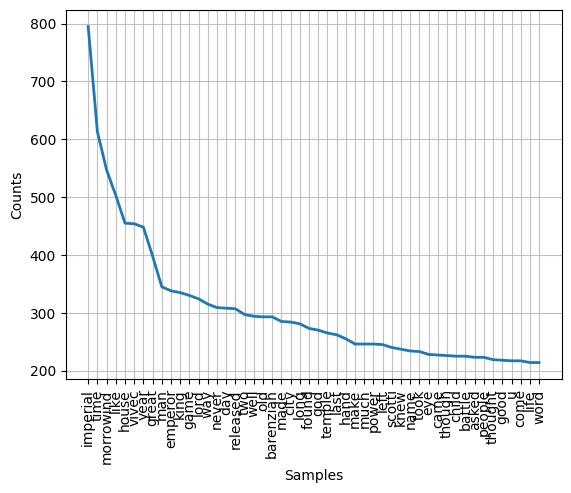

Axes(0.125,0.11;0.775x0.77)


In [77]:
from nltk import FreqDist

frequency_distribution = FreqDist(morrobooks_lemmatized)
frequency_list_graph = frequency_distribution.plot(50, cumulative=False)
print(frequency_list_graph)

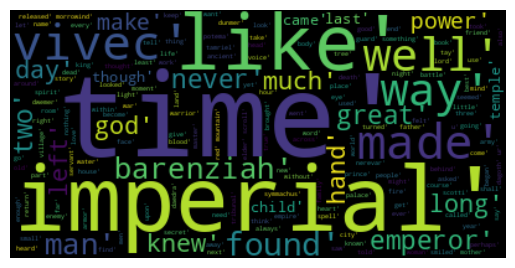

In [78]:
morrobooks_stringed=str(morrobooks_lemmatized)

wordcloud = WordCloud().generate(morrobooks_stringed)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [79]:
import nltk
from nltk.collocations import *
bigram_assoc_measures = nltk.collocations.BigramAssocMeasures()
from collections import Counter

In [80]:
bigrams = nltk.bigrams(morrobooks_words)
for bigram in bigrams:
  print(bigram)

Streaming output truncated to the last 5000 lines.
('tr', 'ksvvwr')
('ksvvwr', 'lrxqfeawmgp')
('lrxqfeawmgp', 'cf')
('cf', 'tkmk')
('tkmk', 'uitjhgl')
('uitjhgl', 'jwk')
('jwk', 'mdnwuhq')
('mdnwuhq', 'hdw')
('hdw', 'lcywn')
('lcywn', 'kjgol')
('kjgol', 'phvkqbsl')
('phvkqbsl', 'lrlgfwsw')
('lrlgfwsw', 'mf')
('mf', 'vvw')
('vvw', 'lhkwprk')
('lhkwprk', 'aqh')
('aqh', 'htchhhgagg')
('htchhhgagg', 'gf')
('gf', 'wlw')
('wlw', 'psjeyejkbw')
('psjeyejkbw', 'aqh')
('aqh', 'wcuwroc')
('wcuwroc', 'syoatv')
('syoatv', 'vwrcjtv')
('vwrcjtv', 'cgwf')
('cgwf', 'jessjvga')
('jessjvga', 'hdzw')
('hdzw', 'vvw')
('vvw', 'hrrgt')
('hrrgt', 'hg')
('hg', 'bh')
('bh', 'wat')
('wat', 'mguu')
('mguu', 'qguh')
('qguh', 'zupfdg')
('zupfdg', 'ofd')
('ofd', 'rfwfwwnw')
('rfwfwwnw', 'wwtjsnwkdcpjir')
('wwtjsnwkdcpjir', 'fwnzaeqykrsjsrrsn')
('fwnzaeqykrsjsrrsn', 'gwcuilcfq')
('gwcuilcfq', 'tr')
('tr', 'xzg')
('xzg', 'sephvgtoltdgzosftwlw')
('sephvgtoltdgzosftwlw', 'psjeyejkbw')
('psjeyejkbw', 'pushjsuywlau')
('pu

In [25]:
morrobooks_to_string = str(morrobooks_words)
morrobooks_split = morrobooks_to_string.split()
minimum_number_of_bigrams = 2
top_bigrams_to_return = 20
finder = BigramCollocationFinder.from_words(morrobooks_split)
finder.apply_freq_filter(minimum_number_of_bigrams)
topcollocations=finder.nbest(bigram_assoc_measures.pmi, top_bigrams_to_return)
print(topcollocations)

[("'abasement',", "'august',"), ("'ahignore',", "'filler',"), ("'alain',", "'montrose',"), ("'almion',", "'celmo',"), ("'amelie',", "'bontecou',"), ("'ani',", "'ali',"), ("'arara',", "'uvulas',"), ("'baar',", "'dau',"), ("'baladas',", "'demnevanni',"), ("'balladeer',", "'fakebook',"), ("'bearers',", "'mehrune',"), ("'bivale',", "'teneran',"), ("'camaraderie',", "'goodwill',"), ("'capabilities',", "'surpassed',"), ("'chrysamerethe',", "'paladin',"), ("'claudius',", "'anzione',"), ("'cleans',", "'cistern',"), ("'cloven',", "'duality',"), ("'comings',", "'goings',"), ("'cyro',", "'nordics',")]


**DISTRIBUTIONAL SEMANTICS**

In [180]:
import multiprocessing
import gensim
from gensim.models import Word2Vec

In [181]:
import gensim.downloader
import re

In [196]:
morrobooks_sentences = []

for text in texts_cleared:
  sentences = text.split('.')
  for sentence in sentences:
    if len(sentence) > 5:
      morrobooks_sentences.append(sentence)

In [197]:
len(morrobooks_sentences)

17648

In [198]:
morrobooks_sentences[:5]

['A Dance in Fire — The Imperial Library       A Dance in Fire\nReleased In: TES3: Morrowind, TES4: Oblivion, TES5: Skyrim Category: Fiction & Narrative Author (in-game): Waughin JarthA Dance in Fire, v1Scene: The Imperial City, CyrodiilDate: 7 Frost Fall, 3E 397It seemed as if the palace had always housed the Atrius Building Commission, the company of clerks and estate agents who authored and notarized nearly every construction of any note in the Empire',
 ' It had stood for two hundred and fifty years, since the reign of the Emperor Magnus, a plain-fronted and austere hall on a minor but respectable plaza in the Imperial City',
 ' Energetic and ambitious middle-class lads and ladies worked there, as well as complacent middle-aged ones like Decumus Scotti',
 ' No one could imagine a world without the Commission, least of all Scotti',
 ' To be accurate, he could not imagine a world without himself in the Commission']

In [200]:
tokenized_sentences = [re.findall('\w+', sentence) for sentence in morrobooks_sentences]

In [202]:
tokenized_sentences[5]

['Lord',
 'Atrius',
 'is',
 'perfectly',
 'aware',
 'of',
 'your',
 'contributions',
 'said',
 'the',
 'managing',
 'clerk',
 'closing',
 'the',
 'shutter',
 'that',
 'demarcated',
 'Scotti',
 's',
 'office',
 'behind',
 'him']

In [203]:
cores = multiprocessing.cpu_count()

In [204]:
cores

2

In [206]:
w2v_morrobooks_model = Word2Vec(min_count=5,
                     window=2,
                     sample=1e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [207]:
w2v_morrobooks_model.build_vocab(tokenized_sentences)

In [208]:
w2v_morrobooks_model.corpus_count

17648

In [209]:
%%time
w2v_morrobooks_model.train(tokenized_sentences, total_examples=w2v_morrobooks_model.corpus_count, epochs=50)

CPU times: user 20.3 s, sys: 152 ms, total: 20.5 s
Wall time: 20.2 s


(3028401, 14990650)

In [217]:
w2v_morrobooks_model.wv.most_similar('emperor')

[('carefully', 0.9957943558692932),
 ('age', 0.9957630634307861),
 ('devoted', 0.9957506060600281),
 ('presence', 0.9957477450370789),
 ('sad', 0.9957127571105957),
 ('Because', 0.995695948600769),
 ('willing', 0.9956738948822021),
 ('madness', 0.9956650733947754),
 ('observed', 0.9956409931182861),
 ('gaze', 0.9956201910972595)]

In [237]:
w2v_morrobooks_model.wv.most_similar(positive=['wood', 'elf'])

[('close', 0.9976568222045898),
 ('Behind', 0.9976174831390381),
 ('crack', 0.9975883960723877),
 ('Torik', 0.9975700378417969),
 ('particularly', 0.9974875450134277),
 ('height', 0.9974458813667297),
 ('laughter', 0.9974023699760437),
 ('horrible', 0.9973738193511963),
 ('terrible', 0.997361958026886),
 ('noise', 0.9973503351211548)]

In [242]:
w2v_morrobooks_model.wv.most_similar(positive=['tomb', 'thief'], negative=['plague'])

[('treasures', 0.9903537034988403),
 ('rather', 0.9899759888648987),
 ('lock', 0.9897944331169128),
 ('stopped', 0.9897626042366028),
 ('hit', 0.9896810054779053),
 ('blades', 0.9895278811454773),
 ('besides', 0.9894348978996277),
 ('job', 0.9893664121627808),
 ('asleep', 0.9893326759338379),
 ('help', 0.989208459854126)]

**STATISTICS IN PYTHON**

In [84]:
ashlanders_df=pd.read_csv('/content/ashlanders.csv')

In [85]:
ashlanders_df.head(3)

Name Gender      Race   Class      Clan      Faction          Rank  \
0      Addammus   Male  Dark Elf  Hunter  Ahemmusa  Ashlanders   Hearthfriend   
1  Assamma-Idan   Male  Dark Elf   Scout  Ahemmusa  Ashlanders       Initiate   
2      Dutadalk   Male  Dark Elf  Hunter  Ahemmusa  Ashlanders        Brother   

   Level  Health  Magicka  Alarm  Fight  
0      7      71       90      0     30  
1     14     143      108     90     30  
2      9      82       92     90     30

In [89]:
ashlanders_df.tail(3)

Name  Gender      Race       Class    Clan      Faction  \
60  Sonummu Zabamat  Female  Dark Elf  Wise Woman  Zainab  Ashlanders    
61            Tussi  Female  Dark Elf      Healer  Zainab  Ashlanders    
62             Zaba  Female  Dark Elf      Hunter  Zainab  Ashlanders    

          Rank  Level  Health  Magicka  Alarm  Fight  
60  Clanholder     16     266       25     90     30  
61     Brother     10      70      100     90     30  
62    Initiate     14     131       30     90     30

In [90]:
print(ashlanders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     63 non-null     object
 1   Gender   63 non-null     object
 2   Race     63 non-null     object
 3   Class    63 non-null     object
 4   Clan     63 non-null     object
 5   Faction  63 non-null     object
 6   Rank     63 non-null     object
 7   Level    63 non-null     int64 
 8   Health   63 non-null     int64 
 9   Magicka  63 non-null     int64 
 10  Alarm    63 non-null     int64 
 11  Fight    63 non-null     int64 
dtypes: int64(5), object(7)
memory usage: 6.0+ KB
None


In [88]:
ashlanders_df.mean(axis=0, skipna=True, numeric_only=True)

Level       11.206349
Health     108.365079
Magicka     84.476190
Alarm       83.015873
Fight       30.634921
dtype: float64

In [226]:
ashlanders_df.median(axis=0, skipna=True, numeric_only=True)

Level      11.0
Health     98.0
Magicka    94.0
Alarm      90.0
Fight      30.0
dtype: float64

In [92]:
ashlanders_df.corr(numeric_only=True)

Level    Health   Magicka     Alarm     Fight
Level    1.000000  0.796050 -0.152231  0.140115  0.096608
Health   0.796050  1.000000 -0.538102  0.115135  0.086767
Magicka -0.152231 -0.538102  1.000000 -0.105610  0.097950
Alarm    0.140115  0.115135 -0.105610  1.000000  0.057077
Fight    0.096608  0.086767  0.097950  0.057077  1.000000

**MACHINE LEARNING**

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, r2_score, mean_absolute_error, mean_squared_error

In [101]:
ashlanders_df=pd.read_csv('/content/ashlanders.csv')

In [102]:
ashlanders_df.head(5)

Name  Gender      Race   Class      Clan      Faction  \
0      Addammus    Male  Dark Elf  Hunter  Ahemmusa  Ashlanders    
1  Assamma-Idan    Male  Dark Elf   Scout  Ahemmusa  Ashlanders    
2      Dutadalk    Male  Dark Elf  Hunter  Ahemmusa  Ashlanders    
3         Kammu  Female  Dark Elf   Scout  Ahemmusa  Ashlanders    
4         Kausi    Male  Dark Elf  Herder  Ahemmusa  Ashlanders    

           Rank  Level  Health  Magicka  Alarm  Fight  
0  Hearthfriend      7      71       90      0     30  
1      Initiate     14     143      108     90     30  
2       Brother      9      82       92     90     30  
3  Hearthfriend      7      98       24     90     30  
4      Initiate     12     118       98     90     30

Классификация

In [103]:
X_ashlanders = ashlanders_df[['Class']]
y_ashlanders = ashlanders_df['Gender'].tolist()

In [104]:
from sklearn.preprocessing import OneHotEncoder
onehot_ashlanders = OneHotEncoder()

In [105]:
X_ashlanders_train, X_ashlanders_test, y_ashlanders_train, y_ashlanders_test = train_test_split(X_ashlanders,
                                                                                y_ashlanders,
                                                                                stratify=y_ashlanders,
                                                                                shuffle=True)

In [106]:
onehot_ashlanders.fit(X_ashlanders_train)
X_ashlanders_train_enc = onehot_ashlanders.transform(X_ashlanders_train)

In [107]:
onehot_ashlanders.fit(X_ashlanders_test)
X_ashlanders_test_enc = onehot_ashlanders.transform(X_ashlanders_test)

In [108]:
label_ashlanders = LabelEncoder()

In [109]:
label_ashlanders.fit(y_ashlanders_train)
y_ashlanders_train_enc = label_ashlanders.transform(y_ashlanders_train)
y_ashlanders_test_enc = label_ashlanders.transform(y_ashlanders_test)

In [110]:
from sklearn.naive_bayes import BernoulliNB
ashlanders_nb = BernoulliNB()

In [111]:
ashlanders_nb.fit(X_ashlanders_test_enc, y_ashlanders_test_enc)

BernoulliNB()

In [112]:
preds_ashlanders = ashlanders_nb.predict(X_ashlanders_test_enc)

In [113]:
print(classification_report(y_ashlanders_test_enc, preds_ashlanders, target_names=label_ashlanders.classes_))

              precision    recall  f1-score   support

      Female       1.00      0.33      0.50         6
        Male       0.71      1.00      0.83        10

    accuracy                           0.75        16
   macro avg       0.86      0.67      0.67        16
weighted avg       0.82      0.75      0.71        16



Регрессия

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
tfidf = TfidfVectorizer()

In [116]:
tfidf.fit(X_ashlanders_train)

TfidfVectorizer()

In [117]:
X_ashlanders_train_vec = tfidf.transform(X_ashlanders_train)
X_ashlanders_test_vec = tfidf.transform(X_ashlanders_test)

In [118]:
label_ashlanders.fit(y_ashlanders_train)
y_ashlanders_train_enc = label_ashlanders.transform(y_ashlanders_train)
y_ashlanders_test_enc = label_ashlanders.transform(y_ashlanders_test)

In [119]:
from sklearn.linear_model import LogisticRegression

In [129]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [120]:
logreg = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')

In [123]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [155]:
X_ashlanders = ashlanders_df[['Health', 'Magicka']]
y_ashlanders = ashlanders_df['Level'].tolist()


In [156]:
X_ashlanders_train, X_ashlanders_test, y_ashlanders_train, y_ashlanders_test = train_test_split(X_ashlanders, y_ashlanders, test_size=0.2)

In [157]:
ashlanders_scaler = MinMaxScaler()

In [158]:
ashlanders_scaler.fit(X_ashlanders_train)

MinMaxScaler()

In [159]:
X_ashlanders_train_scaled = ashlanders_scaler.transform(X_ashlanders_train)
X_ashlanders_test_scaled = ashlanders_scaler.transform(X_ashlanders_test)

In [160]:
def get_scores(y_test, y_pred):
    print('R^2: %.2f' % r2_score(y_test, y_pred))
    print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
    print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

In [161]:
linreg = LinearRegression()

In [162]:
linreg.fit(X_ashlanders_train_scaled, y_ashlanders_train)

LinearRegression()

In [163]:
lin_preds_ashlanders = linreg.predict(X_ashlanders_test_scaled)

In [164]:
get_scores(y_ashlanders_test, lin_preds_ashlanders)

R^2: 0.64
MSE: 5.22
MAE: 1.34


In [243]:
lasso = Lasso()

In [244]:
lasso.fit(X_ashlanders_train_scaled, y_ashlanders_train)

Lasso()

In [249]:
lasso_preds_ashlanders = lasso.predict(X_ashlanders_test_scaled)

In [246]:
lasso.coef_

array([-0.,  0.])

In [250]:
get_scores(y_ashlanders_test, lasso_preds_ashlanders)

R^2: -0.01
MSE: 32.63
MAE: 4.26


In [251]:
ridge = Ridge()

In [252]:
ridge.fit(X_ashlanders_train_scaled, y_ashlanders_train)

Ridge()

In [253]:
ridge_preds_ashlanders = ridge.predict(X_ashlanders_test_scaled)

In [254]:
ridge.coef_

array([0.09413332, 1.71994741])

In [255]:
get_scores(y_ashlanders_test, ridge_preds_ashlanders)

R^2: -0.13
MSE: 36.62
MAE: 4.42


In [256]:
poly = PolynomialFeatures(3)

In [257]:
poly.fit(X_ashlanders_train_scaled)

PolynomialFeatures(degree=3)

In [258]:
X_ashlanders_train_poly = poly.transform(X_ashlanders_train_scaled)
X_ashlanders_test_poly = poly.transform(X_ashlanders_test_scaled)

In [259]:
models = {'linreg': LinearRegression(), 'lasso': Lasso(), 'ridge': Ridge()}

for k, v in models.items():
    print(k)
    v.fit(X_ashlanders_train_poly, y_ashlanders_train)
    preds = v.predict(X_ashlanders_test_poly)
    get_scores(y_ashlanders_test, preds)

linreg
R^2: -0.60
MSE: 51.71
MAE: 5.07
lasso
R^2: -0.01
MSE: 32.63
MAE: 4.26
ridge
R^2: -0.21
MSE: 38.97
MAE: 4.56


Меры качества в задачах регрессии:
R^2 - если долю дисперсии близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.
MSE - меньшее значение среднеквадратической ошибки свидетельсвует о том, что выбранная модель допускает меньше грубых ошибок.
MAE более чувствителен к выбросам.

Confusion matrix

In [166]:
X_train_ashlanders, X_test_ashlanders, y_train_ashlanders, y_test_ashlanders = train_test_split(ashlanders_df['Class'],
                                                                                    ashlanders_df['Gender'].tolist(),
                                                                                    stratify=ashlanders_df['Gender'])

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [169]:
tfidf.fit(X_train_ashlanders)

TfidfVectorizer()

In [170]:
X_train_ashlanders_vec = tfidf.transform(X_train_ashlanders)
X_test_ashlanders_vec = tfidf.transform(X_test_ashlanders)

In [171]:
le_ashlanders = LabelEncoder()

In [172]:
le_ashlanders.fit(y_train_ashlanders)
y_train_ashlanders_enc = le_ashlanders.transform(y_train_ashlanders)
y_test_ashlanders_enc = le_ashlanders.transform(y_test_ashlanders)

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
logreg = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced')

In [175]:
logreg.fit(X_train_ashlanders_vec, y_train_ashlanders_enc)

LogisticRegression(class_weight='balanced', multi_class='ovr', random_state=42)

In [176]:
ashlanders_class_pred = logreg.predict(X_test_ashlanders_vec)

In [177]:
print(classification_report(y_test_ashlanders_enc,
                            ashlanders_class_pred,
                            target_names=le_ashlanders.classes_))

              precision    recall  f1-score   support

      Female       0.57      0.67      0.62         6
        Male       0.78      0.70      0.74        10

    accuracy                           0.69        16
   macro avg       0.67      0.68      0.68        16
weighted avg       0.70      0.69      0.69        16



In [260]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

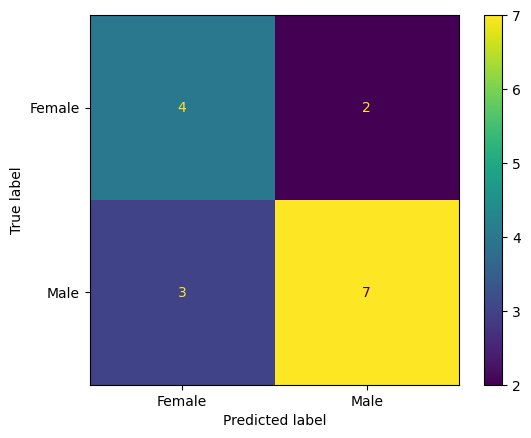

In [261]:
cm = confusion_matrix(y_test_ashlanders_enc, ashlanders_class_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=le_ashlanders.classes_).plot()